In [10]:
import pyramses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import skfda.representation.basis as basis
from skfda.representation.interpolation import SplineInterpolator
from skfda import FDataGrid
from skfda.misc import LinearDifferentialOperator
import sklearn

VOLTAGE INSTABILITY AT OPERATING POINT B
====================

In [2]:
def data(X,y):
    
    '''
    X = operating points generated through ARTERE
    y = percentage to be changed in CHGPRM
    
    '''
        
    case = pyramses.cfg() # Create a new scenario
    case.addData('dyn_B.dat') # Dynamic data file
    case.addData(X) # Power-flow (static) data
    case.addData('settings1.dat') # Solver settings
    case.addObs("obs.dat") # File with the variables to be saved for offline analysis
    case.addTrj("out.trj") # File for saving the variables for offline analysis
    case.addDst('short_trip_branch.dst') # Description of disturbance
    Thorizon = 3000

    ram = pyramses.sim() # Create a new simulator instance
    ret = ram.execSim(case,0) # Start simulation paused at t=0

    ram.addDisturb(5.000, 'CHGPRM INJ L_01 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_01 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_02 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_02 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_03 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_03 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_04 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_04 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_05 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_05 P0 'r"%s"% y + ' % 600')

    try:
        ret = ram.contSim(Thorizon) # Run simulation
    except:
        print(ram.getLastErr())

    try:
        ram.endSim()
        ret = ram.contSim(Thorizon+1) # Run simulation
    except:
        print(ram.getLastErr())

    ext = pyramses.extractor(case.getTrj())
    
    
    
#     GET VOLTAGE MAGNITUDE FOR ALL BUSES
#     ===================================


    bus_name = ram.getAllCompNames("BUS")

    valu = []
    main = []

    class dataframe:
        def __init__(self,bus_name):
            self.busName = bus_name


        def V_mag(self):

            for i in self.busName:
                a = ext.getBus(i).mag
                main.append((a))

            return (main)

        def vu(self):

            val = self.V_mag()

            for i in range(0,len(self.busName)):

                mag=val[i].value
                valu.append(mag)

        def make_df(self):

            y = self.vu()
            df = pd.DataFrame(valu)
            df = df.T
            df.columns = self.busName
            df['Time'] = main[0].time
            df.set_index("Time", inplace = True)
            return df

    r = dataframe(bus_name)
    vol_mag = r.make_df()
    vol_mag.head()

#     v = ext.getBus('1044').mag
#     import matplotlib
#     matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
#     ext.getBus('1041').mag.plot()
#     plt.show()
    
    
    return(vol_mag)
    

GENERATE DATA FOR ANALYSIS
==========================

In [3]:
list_of_files = []
for j in range(1,4):
    list_files = ('If_B'+r"%s"% j+'.DAT')
    list_of_files.append(list_files)

In [6]:
vol_mag = []
for i in range(0,3):                      # Here first ten records are generated out of 720 operating point
    vol_data = data(list_of_files[i],50)   # increase load by 50%
    vol_mag.append(vol_data)

ERROR CALL FROM DCTL sim_minmaxvolt Voltages t =  238.2020         Voltage out of bounds at bus g6 :  0.49
ERROR CALL FROM Load records
ERROR CALL FROM DCTL sim_minmaxvolt Voltages t =  234.7620         Voltage out of bounds at bus g6 :  0.49
ERROR CALL FROM Load records
ERROR CALL FROM DCTL sim_minmaxvolt Voltages t =  234.7620         Voltage out of bounds at bus g6 :  0.49
ERROR CALL FROM Load records


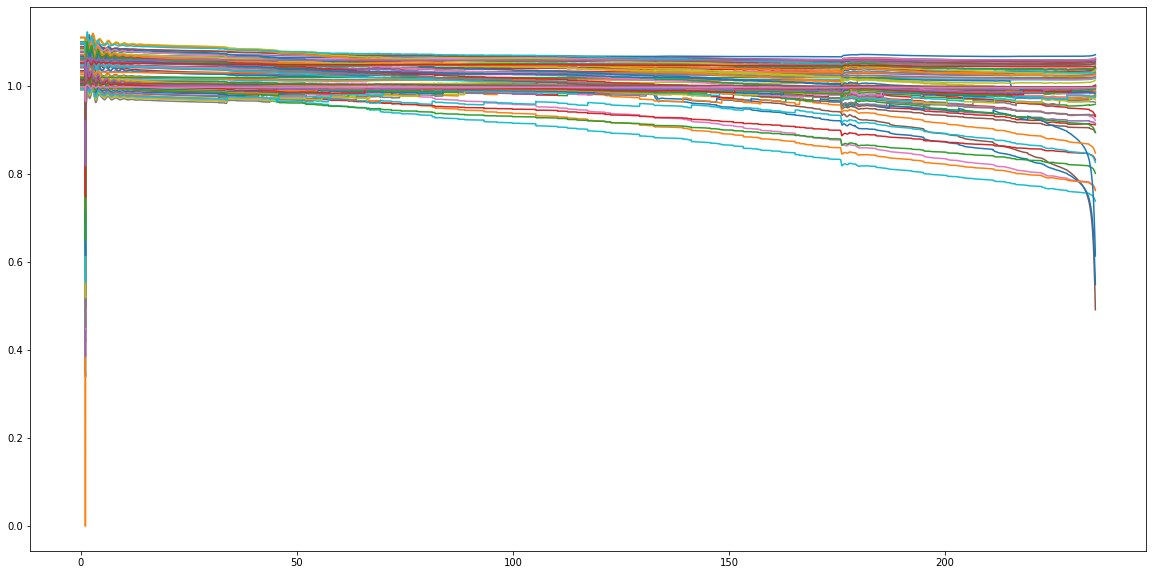

In [14]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.plot(vol_mag[1])
plt.show()